# Chapter 2: An Introduction to Portfolio Construction

## Listing 2.1

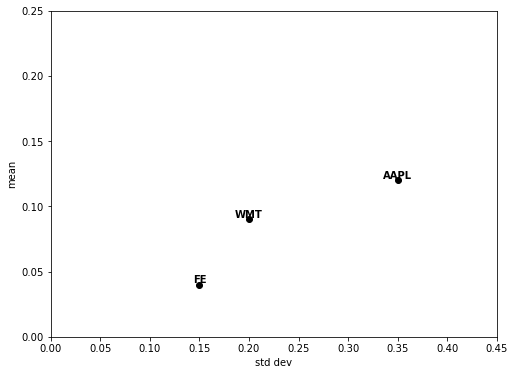

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stocks = ['FE', 'WMT', 'AAPL']
mu = [.04, 0.09, .12]
sigma = [.15, .20, .35]

def plot_points(mu, sigma, stocks):
    plt.figure(figsize=(8,6))
    plt.scatter(sigma, mu, c='black')
    plt.xlim(0,.45)
    plt.ylim(0,.25)
    plt.ylabel('mean')
    plt.xlabel('std dev')
    for i, stock in enumerate(stocks):
        plt.annotate(stock, (sigma[i], mu[i]), ha='center', va='bottom', weight='bold')
        
plot_points(mu, sigma, stocks)
plt.show();

## Listing 2.2

In [2]:
w = np.array([0.2, 0.3, 0.5])

mu_p = np.dot(w, mu)
print('Expected portfolio return, Method #1: ', mu_p)

mu_p = mu @ w.T
print('Expected portfolio return, Method #2: ', mu_p)

Expected portfolio return, Method #1:  0.095
Expected portfolio return, Method #2:  0.095


## Listing 2.3

In [3]:
Corr = [[ 1.  ,  0.1 ,  0.17],
        [ 0.1 ,  1.  ,  0.26],
        [ 0.17,  0.26,  1.  ]]

Cov = np.outer(sigma, sigma) * Corr
print('Covariance matrix, Method #1: \n', Cov)

Cov = np.diag(sigma) @ Corr @ np.diag(sigma)
print('Covariance matrix, Method #2: \n', Cov)

Covariance matrix, Method #1: 
 [[0.0225   0.003    0.008925]
 [0.003    0.04     0.0182  ]
 [0.008925 0.0182   0.1225  ]]
Covariance matrix, Method #2: 
 [[0.0225   0.003    0.008925]
 [0.003    0.04     0.0182  ]
 [0.008925 0.0182   0.1225  ]]


## Listing 2.4

In [4]:
sigma_p = (w @ Cov @ w.T) ** 0.5
print('Portfolio standard deviation, Method #1: ', sigma_p)

w_matrix = np.asmatrix(w)
sigma_p = (w_matrix * Cov * w_matrix.T).item() ** 0.5
print('Portfolio standard deviation, Method #2: ', sigma_p)

Portfolio standard deviation, Method #1:  0.20671236053995415
Portfolio standard deviation, Method #2:  0.20671236053995415


## Listing 2.5

In [5]:
def random_weights(n_assets):
    k = np.random.randn(n_assets)
    return k / sum(k)
print(random_weights(3))

[0.36452774 0.06290231 0.57256994]


## Listing 2.6

In [6]:
def mu_sigma_portfolio(weights, means, Cov):
    mu_p = np.dot(weights, means)
    sigma_p = (weights @ Cov @ weights.T) ** 0.5
    return mu_p, sigma_p

## Listing 2.7

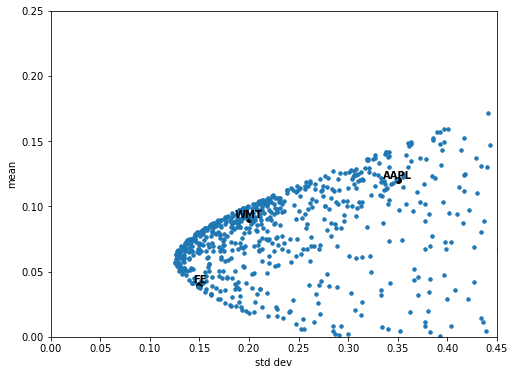

In [7]:
def plot_random_portfolios(n_simulations, n_assets):
    mu_p_sims = []
    sigma_p_sims = []
    for i in range(n_simulations):
        w = random_weights(n_assets)
        mu_p, sigma_p = mu_sigma_portfolio(w, mu, Cov)
        mu_p_sims.append(mu_p)
        sigma_p_sims.append(sigma_p)
    plt.scatter(sigma_p_sims, mu_p_sims, s=12)

plot_points(mu, sigma, stocks)

n_simulations = 1000
n_assets = 3 
plot_random_portfolios(n_simulations, n_assets)    
plt.show();

## Listing 2.8

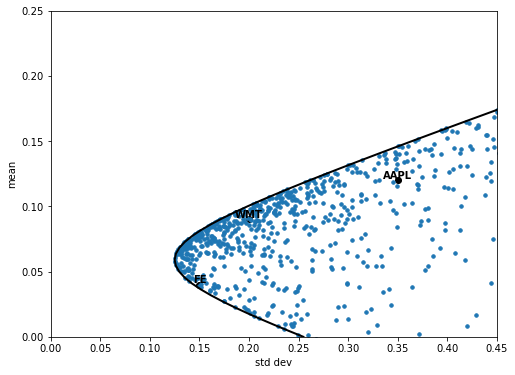

In [15]:
def plot_min_var_frontier(mu, Cov):
    A,B,C = compute_ABC(mu, Cov)
    y = np.linspace(0,.45,100)
    x = (A*y*y-2*B*y+C)/(A*C-B*B)
    x = np.sqrt(x)
    plt.plot(x,y, color='black', lw=2.0)
    
def compute_ABC(mu, Cov):
    Cov_inv = np.linalg.inv(Cov)
    ones = np.ones(n_assets)
    A = ones @ Cov_inv @ ones
    B = ones @ Cov_inv @ mu
    C = mu @ Cov_inv @ mu
    return A,B,C    

plot_points(mu, sigma, stocks)
plot_random_portfolios(n_simulations, n_assets)    
plot_min_var_frontier(mu, Cov)
plt.show();

## Listing 2.9

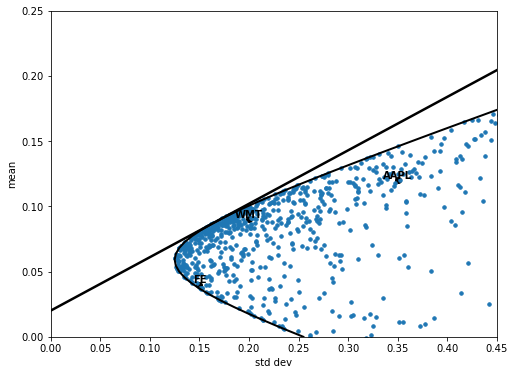

In [16]:
def plot_Capital_Allocation_Line(rf, mu, Cov):
    A,B,C = compute_ABC(mu, Cov)
    x = np.linspace(0,.45,100)
    y = rf + x*(C-2*B*rf+A*rf**2)**0.5
    plt.plot(x,y, color='black', lw=2.5)

plot_points(mu, sigma, stocks)
plot_random_portfolios(n_simulations, n_assets)    
plot_min_var_frontier(mu, Cov)

rf = 0.02
plot_Capital_Allocation_Line(rf, mu, Cov)
plt.show();

In [17]:
# Compute the tangent portfolio

from math import sqrt
rf = 0.02

Cov_inv = np.linalg.inv(Cov)
ones = np.ones(n_assets)
A = ones @ Cov_inv @ ones
B = ones @ Cov_inv @ mu
C = mu @ Cov_inv @ mu
y_tan = (C-B*rf)/(B-A*rf)
x_tan = sqrt(((C-2*B*rf+A*rf**2)/(B-A*rf)**2))
print('The volatility of the tangent portfolio is      :', x_tan)
print('The expected return of the tangent portfolio is :', y_tan)

The volatility of the tangent portfolio is      : 0.16438811780812757
The expected return of the tangent portfolio is : 0.08737452819726511


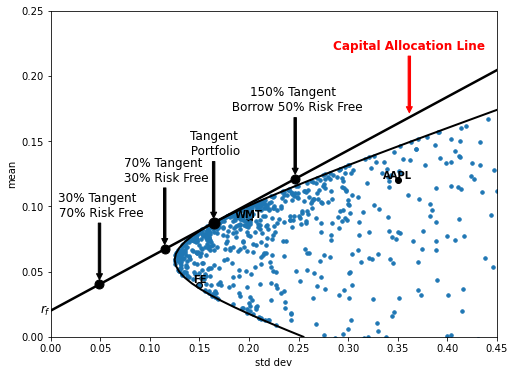

In [18]:
plot_points(mu, sigma, stocks)
plot_random_portfolios(n_simulations, n_assets)    
plot_min_var_frontier(mu, Cov)

plot_Capital_Allocation_Line(rf, mu, Cov)

arrowprops = dict(arrowstyle="simple", color='k')
plt.plot(x_tan, y_tan, marker='o', ms=11, color='k')
plt.annotate('Tangent\n Portfolio', xy=(x_tan,y_tan+.002),
             xycoords='data',
             xytext=(x_tan,y_tan+.05),
             ha='center', va='bottom', size=12,
             arrowprops=arrowprops,
            )
plt.plot(0.7*x_tan,0.7*(y_tan-rf)+rf, marker='o', ms=9, color='k')
plt.annotate('70% Tangent \n 30% Risk Free', xy=(0.7*x_tan,0.7*(y_tan-rf)+rf+.002),
             xycoords='data',
             xytext=(0.7*x_tan,0.7*(y_tan-rf)+rf+.05),
             ha='center', va='bottom', size=12,
             arrowprops=arrowprops,
            )
plt.plot(0.3*x_tan,0.3*(y_tan-rf)+rf, marker='o', ms=9, color='k')
plt.annotate('30% Tangent \n 70% Risk Free', xy=(0.3*x_tan,0.3*(y_tan-rf)+rf+.002),
             xycoords='data',
             xytext=(0.3*x_tan,0.3*(y_tan-rf)+rf+.05),
             ha='center', va='bottom', size=12,
             arrowprops=arrowprops,
            )
plt.plot(1.5*x_tan,1.5*(y_tan-rf)+rf, marker='o', ms=9, color='k')
plt.annotate('150% Tangent \n Borrow 50% Risk Free', xy=(1.5*x_tan,1.5*(y_tan-rf)+rf+.002),
             xycoords='data',
             xytext=(1.5*x_tan,1.5*(y_tan-rf)+rf+.05),
             ha='center', va='bottom', size=12,
             arrowprops=arrowprops,
            )
arrowprops = dict(arrowstyle="simple", color='r')
#plt.plot(2.5*x_tan,2.5*(y_tan-rf)+rf, marker='o', ms=9, color='k')
plt.annotate('Capital Allocation Line', xy=(2.2*x_tan,2.2*(y_tan-rf)+rf+.002),
             xycoords='data',
             xytext=(2.2*x_tan,2.2*(y_tan-rf)+rf+.05),
             ha='center', va='bottom', size=12,
             arrowprops=arrowprops, weight='bold', color='r',
            )

plt.annotate('$r_f$', xy=(0,rf),
             xycoords='data',
             xytext=(0,rf),
             ha='right', va='center', size=12,
            )

plt.show();

## Listing 2.10

In [20]:
from scipy.stats import norm
from ipywidgets import *

def update(pct_stock):
    wealth = 1000000
    mu = np.array([0.02, 0.10]) * wealth
    sigma = np.array([0.05, 0.20]) * wealth
    w = np.array([1-pct_stock/100, pct_stock/100])
    Corr = [[ 1. ,-0.1],
            [-0.1, 1. ]]
    Cov = np.outer(sigma, sigma) * Corr
    mu_p, sigma_p = mu_sigma_portfolio(w, mu, Cov)
    
    x = np.linspace(-2.2*sigma[1], +2.2*sigma[1], 100)
   
    arrowprops = dict(arrowstyle="simple", color='k')
    xp = -1.96*sigma_p + mu_p
    xp = round(xp,-3)
    yp = norm.pdf(xp, mu_p, sigma_p)
    plt.figure(figsize=(8,6)) 
    plt.annotate('95% Worst\n Case Loss:\n${:,.0f}'.format(xp), xy=(xp,yp),
             xycoords='data',
             xytext=(xp,yp*2.5),
             ha='center', va='bottom', size=12,
             arrowprops=arrowprops,
            )
    xp = mu_p
    xp = round(xp,-3)
    yp = norm.pdf(xp, mu_p, sigma_p)    
    plt.annotate('Average\n Gain:\n${:,.0f}'.format(mu_p), xy=(xp,yp),
             xycoords='data',
             xytext=(xp,yp*.8),
             ha='center', va='top', size=12,
             arrowprops=arrowprops,
            )
    plt.plot(x, norm.pdf(x, mu_p, sigma_p))
    plt.show()

interact(update, pct_stock = widgets.IntSlider(value=50, min=0, max=100, step=10));

interactive(children=(IntSlider(value=50, description='pct_stock', step=10), Output()), _dom_classes=('widget-…